<a href="https://colab.research.google.com/github/BaghasWahyu/Cryptocurrency-Predicition-App/blob/main/Crypto_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# from google.colab import drive
# drive.flush_and_unmount()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [5]:
crypto_name_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypro_symbol_list = []

In [6]:
df = pd.DataFrame()

In [7]:
def scrape(date):
  URL = 'https://coinmarketcap.com/historical/'+date
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, 'html.parser')
  tr = soup.find_all('tr', attrs={'class':'cmc-table-row'})
  count = 0
  for row in tr:
    if count == 10:
      break;
    count = count + 1
    name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
    crypto_name = name_column.find('a', attrs={'class':'cmc-table__column-name--name cmc-link'}).text.strip()
    coin_market_cap = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
    crypto_price = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
    crypto_circulating_supply_symbol = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
    crypto_circulating_supply = crypto_circulating_supply_symbol.split(' ')[0]
    crypto_symbol = crypto_circulating_supply_symbol.split(' ')[1]

    crypto_name_list.append(crypto_name)
    crypto_market_cap_list.append(coin_market_cap)
    crypto_price_list.append(crypto_price)
    crypto_circulating_supply_list.append(crypto_circulating_supply)
    crypro_symbol_list.append(crypto_symbol)

In [8]:
from datetime import datetime

tanggal = '2022-12-31' #@param {type:"date"}
tanggal = tanggal.replace("-","")


In [9]:
print(tanggal)

20221231


In [10]:
scrape(date = f'{tanggal}/')

In [11]:
df['Name'] =  crypto_name_list
df['Market Capitalization'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Symbol'] = crypro_symbol_list

In [12]:
df

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB
5,XRP,"$17,113,207,466.28",$0.3399,"50,343,500,506",XRP
6,Binance USD,"$16,695,767,093.61",$1.0002,"16,692,004,510",BUSD
7,Dogecoin,"$9,325,956,852.39",$0.07029,"132,670,764,300",DOGE
8,Cardano,"$8,505,385,897.18",$0.2465,"34,509,377,667",ADA
9,Polygon,"$6,625,126,687.82",$0.7585,"8,734,317,475",MATIC


In [13]:
list_crypto = df[:5]

In [14]:
list_crypto

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB


In [15]:
nama_crypto = list_crypto['Name']
symbol_crypto = list_crypto['Symbol']

In [16]:
nama_crypto

0     Bitcoin
1    Ethereum
2      Tether
3    USD Coin
4         BNB
Name: Name, dtype: object

In [17]:
symbol_crypto

0     BTC
1     ETH
2    USDT
3    USDC
4     BNB
Name: Symbol, dtype: object

In [20]:
print(type(symbol_crypto))

<class 'pandas.core.series.Series'>


In [18]:
symbolCrypto = []

for i in symbol_crypto:
  symbolCrypto.append(i)

In [19]:
symbolCrypto

['BTC', 'ETH', 'USDT', 'USDC', 'BNB']

In [ ]:
!pip install cryptocmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
from datetime import datetime

startdate = "2019-01-01" #@param {type:"date"}
startdate = datetime.strptime(startdate, '%Y-%m-%d').date()
startdate = startdate.strftime("%d-%m-%Y")

enddate = "2022-12-31" #@param {type:"date"}
enddate = datetime.strptime(enddate, '%Y-%m-%d').date()
enddate = enddate.strftime("%d-%m-%Y")

In [ ]:
import ipywidgets as widgets

crypto = widgets.Dropdown(options =symbolCrypto)
output = widgets.Output()
def select(change):
  output.clear_output()
  if(change.new == symbolCrypto[0]):
    with output:
      display(symbolCrypto[0])
  elif(change.new == symbolCrypto[1]):
    with output:
      display(symbolCrypto[1])
  elif(change.new == symbolCrypto[2]):
    with output:
      display(symbolCrypto[2])
  elif(change.new == symbolCrypto[3]):
    with output:
      display(symbolCrypto[3])
  elif(change.new == symbolCrypto[4]):
    with output:
      display(symbolCrypto[4])
  else:
    with output:
      display("Error: option not found")

crypto.observe(select, names="value")
display(crypto)
display(output)

Dropdown(options=('BTC', 'ETH', 'USDT', 'USDC', 'BNB'), value='BTC')

Output()

In [ ]:
crypto = crypto.value

In [ ]:
from cryptocmd import CmcScraper

scraper = CmcScraper(crypto, startdate, enddate)
df = scraper.get_dataframe()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-12-31,16603.674703,16628.986997,16517.519222,16547.495366,1.123919e+10,3.185163e+11
1,2022-12-30,16641.329824,16643.427410,16408.475177,16602.585156,1.592916e+10,3.195595e+11
2,2022-12-29,16552.322491,16651.756664,16508.683153,16642.342672,1.447224e+10,3.203093e+11
3,2022-12-28,16716.400221,16768.170356,16497.557039,16552.571737,1.700571e+10,3.185671e+11
4,2022-12-27,16919.291650,16959.846476,16642.073182,16717.173980,1.574858e+10,3.217172e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [ ]:
df['Open'] = df['Open'].apply(lambda x:round(x,2))
df['High'] = df['High'].apply(lambda x:round(x,2))
df['Low'] = df['Low'].apply(lambda x:round(x,2))
df['Close'] = df['Close'].apply(lambda x:round(x,2))
df['Volume'] = df['Volume'].apply(lambda x:round(x,0))
df['Market Cap'] = df['Market Cap'].apply(lambda x:round(x,0))

In [ ]:
df = df[::-1]
df = df.reset_index()

In [ ]:
df = df.drop(columns=['index'])

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,4.324201e+09,6.709863e+10
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,5.244857e+09,6.884986e+10
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,4.530215e+09,6.699492e+10
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,4.847965e+09,6.736833e+10
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,5.137610e+09,6.715757e+10
...,...,...,...,...,...,...,...
1456,2022-12-27,16919.29,16959.85,16642.07,16717.17,1.574858e+10,3.217172e+11
1457,2022-12-28,16716.40,16768.17,16497.56,16552.57,1.700571e+10,3.185671e+11
1458,2022-12-29,16552.32,16651.76,16508.68,16642.34,1.447224e+10,3.203093e+11
1459,2022-12-30,16641.33,16643.43,16408.48,16602.59,1.592916e+10,3.195595e+11


In [ ]:
df.to_excel(f"{crypto}_data_historis.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [ ]:
#Mengubah kolom Date menjadi index
df = df[['Date','Open','High','Low','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', drop=True, inplace=True) # Setting date column as index
df

,Open,High,Low,Close
Date,,,,
2019-01-01,3746.71,3850.91,3707.23,3843.52
2019-01-02,3849.22,3947.98,3817.41,3943.41
2019-01-03,3931.05,3935.69,3826.22,3836.74
2019-01-04,3832.04,3865.93,3783.85,3857.72
2019-01-05,3851.97,3904.90,3836.90,3845.19
...,...,...,...,...
2022-12-27,16919.29,16959.85,16642.07,16717.17
2022-12-28,16716.40,16768.17,16497.56,16552.57
2022-12-29,16552.32,16651.76,16508.68,16642.34


In [ ]:
crypto_data = df

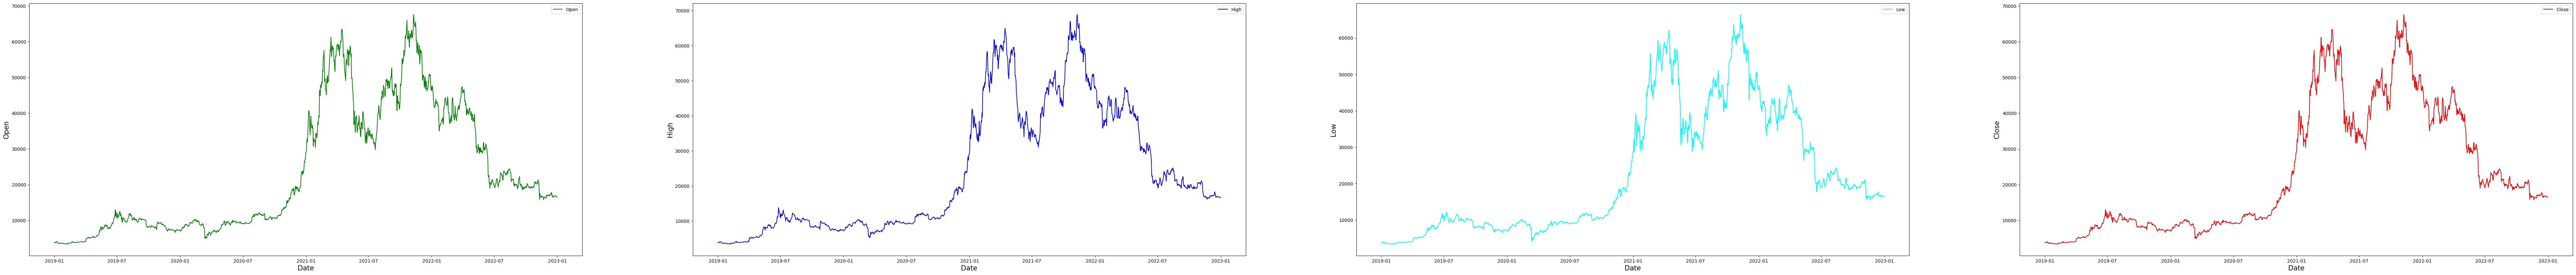

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(100,10))

ax[0].plot(crypto_data['Open'], label='Open', color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Open',size=15)
ax[0].legend()

ax[1].plot(crypto_data['High'], label='High', color='blue')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('High',size=15)
ax[1].legend()

ax[2].plot(crypto_data['Low'], label='Low', color='cyan')
ax[2].set_xlabel('Date',size=15)
ax[2].set_ylabel('Low',size=15)
ax[2].legend()

ax[3].plot(crypto_data['Close'], label='Close' ,color='red')
ax[3].set_xlabel('Date',size=15)
ax[3].set_ylabel('Close',size=15)
ax[3].legend()

fig.show()

# Data Pre-Processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(feature_range=(0, 1))
crypto_data[crypto_data.columns] = MMS.fit_transform(crypto_data)

In [ ]:
crypto_data.shape

(1461, 4)

In [ ]:
#Pembagian data training dan data testing sebesar 90% dan 10% masing-masing
training_size = round(len(crypto_data) * 0.90)
training_size

1315

In [ ]:
train_data = crypto_data[:training_size]
test_data  = crypto_data[training_size:]

train_data.shape, test_data.shape

((1315, 4), (146, 4))

In [ ]:
test_data

,Open,High,Low,Close
Date,,,,
2022-08-08,0.308319,0.317858,0.314101,0.318075
2022-08-09,0.318170,0.313191,0.311012,0.308020
2022-08-10,0.308060,0.316691,0.307671,0.320228
2022-08-11,0.320304,0.327328,0.325602,0.320382
2022-08-12,0.320442,0.321054,0.321732,0.327321
...,...,...,...,...
2022-12-27,0.210729,0.207031,0.210364,0.207546
2022-12-28,0.207566,0.204098,0.208070,0.204981
2022-12-29,0.205008,0.202317,0.208246,0.206380


In [ ]:
# Fungsi untuk membuat rangkaian data untuk training dan testing
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(10, len(dataset)): # memilih 10 baris dalam waktu bersamaan
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
print(test_seq.shape, test_label.shape)

(136, 10, 4) (136, 4)


In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1305, 10, 4), (1305, 4), (136, 10, 4), (136, 4))

In [ ]:
train_seq.shape[1], train_seq.shape[2]

(10, 4)

# Creating LSTM model

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
# Struktur jaringan LSTM
def LSTM_model():
  model = Sequential()
  model.add(LSTM(units=100, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100, return_sequences=True,))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100))
  model.add(Dropout(0.2))

  model.add(Dense(4))

  return model

In [ ]:
  model = LSTM_model()
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           42000     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4)                 4

In [ ]:
def show_bias_and_weight(model):
  """Prints the bias and weights of a Keras model."""
  st.write("**Bias and weights**")
  for layer in model.layers:
    w, b = layer.get_weights()
    st.write(f"Layer: {layer.name}")
    st.write(f"Bias: {b}")
    st.write(f"Weights: {w}")


In [ ]:
show_bias_and_weight(model)

In [ ]:
filepath = f'{crypto}_model'

In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model.fit(train_seq, train_label, batch_size=32, epochs=100, validation_data=(test_seq, test_label), verbose=1, callbacks=callbacks)

Epoch 1/100
41/41 [==============================] - ETA: 0s - loss: 0.0228 - mean_absolute_error: 0.0913
Epoch 1: val_loss improved from inf to 0.00046, saving model to BTC_model


41/41 [==============================] - 37s 643ms/step - loss: 0.0228 - mean_absolute_error: 0.0913 - val_loss: 4.5568e-04 - val_mean_absolute_error: 0.0157
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 0.0042 - mean_absolute_error: 0.0394
Epoch 2: val_loss improved from 0.00046 to 0.00032, saving model to BTC_model


41/41 [==============================] - 15s 384ms/step - loss: 0.0042 - mean_absolute_error: 0.0394 - val_loss: 3.2330e-04 - val_mean_absolute_error: 0.0134
Epoch 3/100
40/41 [============================>.] - ETA: 0s - loss: 0.0039 - mean_absolute_error: 0.0388
Epoch 3: val_loss did not improve from 0.00032
41/41 [==============================] - 2s 40ms/step - loss: 0.0039 - mean_absolute_error: 0.0388 - val_loss: 3.6112e-04 - val_mean_absolute_error: 0.0132
Epoch 4/100
41/41 [==============================] - ETA: 0s - loss: 0.0037 - mean_absolute_error: 0.0377
Epoch 4: val_loss did not improve from 0.00032
41/41 [==============================] - 2s 59ms/step - loss: 0.0037 - mean_absolute_error: 0.0377 - val_loss: 3.6642e-04 - val_mean_absolute_error: 0.0153
Epoch 5/100
41/41 [==============================] - ETA: 0s - loss: 0.0033 - mean_absolute_error: 0.0355
Epoch 5: val_loss did not improve from 0.00032
41/41 [==============================] - 1s 36ms/step - loss: 0.0033 - 

41/41 [==============================] - 15s 371ms/step - loss: 0.0041 - mean_absolute_error: 0.0403 - val_loss: 2.6867e-04 - val_mean_absolute_error: 0.0124
Epoch 12/100
40/41 [============================>.] - ETA: 0s - loss: 0.0032 - mean_absolute_error: 0.0353
Epoch 12: val_loss did not improve from 0.00027
41/41 [==============================] - 2s 54ms/step - loss: 0.0032 - mean_absolute_error: 0.0351 - val_loss: 8.7424e-04 - val_mean_absolute_error: 0.0245
Epoch 13/100
41/41 [==============================] - ETA: 0s - loss: 0.0027 - mean_absolute_error: 0.0333
Epoch 13: val_loss did not improve from 0.00027
41/41 [==============================] - 1s 34ms/step - loss: 0.0027 - mean_absolute_error: 0.0333 - val_loss: 4.0558e-04 - val_mean_absolute_error: 0.0145
Epoch 14/100
41/41 [==============================] - ETA: 0s - loss: 0.0022 - mean_absolute_error: 0.0291
Epoch 14: val_loss did not improve from 0.00027
41/41 [==============================] - 1s 35ms/step - loss: 0.0

41/41 [==============================] - 17s 412ms/step - loss: 0.0023 - mean_absolute_error: 0.0295 - val_loss: 2.5731e-04 - val_mean_absolute_error: 0.0126
Epoch 19/100
40/41 [============================>.] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0283
Epoch 19: val_loss did not improve from 0.00026
41/41 [==============================] - 2s 50ms/step - loss: 0.0021 - mean_absolute_error: 0.0282 - val_loss: 3.6633e-04 - val_mean_absolute_error: 0.0140
Epoch 20/100
41/41 [==============================] - ETA: 0s - loss: 0.0023 - mean_absolute_error: 0.0295
Epoch 20: val_loss did not improve from 0.00026
41/41 [==============================] - 1s 34ms/step - loss: 0.0023 - mean_absolute_error: 0.0295 - val_loss: 2.6693e-04 - val_mean_absolute_error: 0.0115
Epoch 21/100
41/41 [==============================] - ETA: 0s - loss: 0.0019 - mean_absolute_error: 0.0268
Epoch 21: val_loss did not improve from 0.00026
41/41 [==============================] - 1s 34ms/step - loss: 0.0

41/41 [==============================] - 15s 364ms/step - loss: 0.0018 - mean_absolute_error: 0.0263 - val_loss: 2.2396e-04 - val_mean_absolute_error: 0.0104
Epoch 23/100
41/41 [==============================] - ETA: 0s - loss: 0.0024 - mean_absolute_error: 0.0300
Epoch 23: val_loss did not improve from 0.00022
41/41 [==============================] - 1s 35ms/step - loss: 0.0024 - mean_absolute_error: 0.0300 - val_loss: 2.2605e-04 - val_mean_absolute_error: 0.0117
Epoch 24/100
41/41 [==============================] - ETA: 0s - loss: 0.0018 - mean_absolute_error: 0.0260
Epoch 24: val_loss did not improve from 0.00022
41/41 [==============================] - 1s 34ms/step - loss: 0.0018 - mean_absolute_error: 0.0260 - val_loss: 2.4768e-04 - val_mean_absolute_error: 0.0127
Epoch 25/100
41/41 [==============================] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0282
Epoch 25: val_loss improved from 0.00022 to 0.00022, saving model to BTC_model


41/41 [==============================] - 15s 365ms/step - loss: 0.0021 - mean_absolute_error: 0.0282 - val_loss: 2.2371e-04 - val_mean_absolute_error: 0.0103
Epoch 26/100
40/41 [============================>.] - ETA: 0s - loss: 0.0020 - mean_absolute_error: 0.0274
Epoch 26: val_loss improved from 0.00022 to 0.00022, saving model to BTC_model


41/41 [==============================] - 16s 391ms/step - loss: 0.0020 - mean_absolute_error: 0.0273 - val_loss: 2.1733e-04 - val_mean_absolute_error: 0.0105
Epoch 27/100
41/41 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0251
Epoch 27: val_loss did not improve from 0.00022
41/41 [==============================] - 1s 33ms/step - loss: 0.0017 - mean_absolute_error: 0.0251 - val_loss: 3.3957e-04 - val_mean_absolute_error: 0.0140
Epoch 28/100
41/41 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0253
Epoch 28: val_loss improved from 0.00022 to 0.00016, saving model to BTC_model


41/41 [==============================] - 15s 363ms/step - loss: 0.0017 - mean_absolute_error: 0.0253 - val_loss: 1.6210e-04 - val_mean_absolute_error: 0.0089
Epoch 29/100
41/41 [==============================] - ETA: 0s - loss: 0.0016 - mean_absolute_error: 0.0246
Epoch 29: val_loss did not improve from 0.00016
41/41 [==============================] - 1s 34ms/step - loss: 0.0016 - mean_absolute_error: 0.0246 - val_loss: 3.2179e-04 - val_mean_absolute_error: 0.0136
Epoch 30/100
41/41 [==============================] - ETA: 0s - loss: 0.0016 - mean_absolute_error: 0.0248
Epoch 30: val_loss improved from 0.00016 to 0.00015, saving model to BTC_model


41/41 [==============================] - 14s 361ms/step - loss: 0.0016 - mean_absolute_error: 0.0248 - val_loss: 1.5241e-04 - val_mean_absolute_error: 0.0083
Epoch 31/100
41/41 [==============================] - ETA: 0s - loss: 0.0016 - mean_absolute_error: 0.0249
Epoch 31: val_loss did not improve from 0.00015
41/41 [==============================] - 1s 34ms/step - loss: 0.0016 - mean_absolute_error: 0.0249 - val_loss: 2.6470e-04 - val_mean_absolute_error: 0.0120
Epoch 32/100
41/41 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0240
Epoch 32: val_loss did not improve from 0.00015
41/41 [==============================] - 1s 34ms/step - loss: 0.0015 - mean_absolute_error: 0.0240 - val_loss: 1.6000e-04 - val_mean_absolute_error: 0.0090
Epoch 33/100
40/41 [============================>.] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0234
Epoch 33: val_loss improved from 0.00015 to 0.00014, saving model to BTC_model


41/41 [==============================] - 16s 394ms/step - loss: 0.0014 - mean_absolute_error: 0.0235 - val_loss: 1.4491e-04 - val_mean_absolute_error: 0.0080
Epoch 34/100
41/41 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0254
Epoch 34: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 32ms/step - loss: 0.0017 - mean_absolute_error: 0.0254 - val_loss: 2.3923e-04 - val_mean_absolute_error: 0.0113
Epoch 35/100
41/41 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0230
Epoch 35: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 33ms/step - loss: 0.0014 - mean_absolute_error: 0.0230 - val_loss: 2.6873e-04 - val_mean_absolute_error: 0.0123
Epoch 36/100
41/41 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0233
Epoch 36: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 33ms/step - loss: 0.0

41/41 [==============================] - 15s 363ms/step - loss: 0.0015 - mean_absolute_error: 0.0235 - val_loss: 1.3917e-04 - val_mean_absolute_error: 0.0078
Epoch 38/100
41/41 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0257
Epoch 38: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 33ms/step - loss: 0.0017 - mean_absolute_error: 0.0257 - val_loss: 1.5341e-04 - val_mean_absolute_error: 0.0091
Epoch 39/100
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0227
Epoch 39: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 33ms/step - loss: 0.0013 - mean_absolute_error: 0.0227 - val_loss: 1.4688e-04 - val_mean_absolute_error: 0.0080
Epoch 40/100
40/41 [============================>.] - ETA: 0s - loss: 0.0018 - mean_absolute_error: 0.0260
Epoch 40: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 36ms/step - loss: 0.0

41/41 [==============================] - 15s 373ms/step - loss: 0.0012 - mean_absolute_error: 0.0213 - val_loss: 1.2252e-04 - val_mean_absolute_error: 0.0078
Epoch 46/100
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0230
Epoch 46: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 32ms/step - loss: 0.0013 - mean_absolute_error: 0.0230 - val_loss: 5.3198e-04 - val_mean_absolute_error: 0.0198
Epoch 47/100
41/41 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0219
Epoch 47: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 32ms/step - loss: 0.0013 - mean_absolute_error: 0.0219 - val_loss: 1.3358e-04 - val_mean_absolute_error: 0.0076
Epoch 48/100
41/41 [==============================] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0211
Epoch 48: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 34ms/step - loss: 0.0

41/41 [==============================] - 15s 370ms/step - loss: 9.9297e-04 - mean_absolute_error: 0.0203 - val_loss: 1.0828e-04 - val_mean_absolute_error: 0.0071
Epoch 56/100
40/41 [============================>.] - ETA: 0s - loss: 9.3368e-04 - mean_absolute_error: 0.0201
Epoch 56: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 42ms/step - loss: 9.3154e-04 - mean_absolute_error: 0.0201 - val_loss: 1.4904e-04 - val_mean_absolute_error: 0.0084
Epoch 57/100
41/41 [==============================] - ETA: 0s - loss: 8.3500e-04 - mean_absolute_error: 0.0190
Epoch 57: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 57ms/step - loss: 8.3500e-04 - mean_absolute_error: 0.0190 - val_loss: 1.3122e-04 - val_mean_absolute_error: 0.0086
Epoch 58/100
41/41 [==============================] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0212
Epoch 58: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 3

41/41 [==============================] - 22s 554ms/step - loss: 9.7624e-04 - mean_absolute_error: 0.0198 - val_loss: 9.9661e-05 - val_mean_absolute_error: 0.0067
Epoch 64/100
41/41 [==============================] - ETA: 0s - loss: 9.0627e-04 - mean_absolute_error: 0.0196
Epoch 64: val_loss did not improve from 0.00010
41/41 [==============================] - 1s 32ms/step - loss: 9.0627e-04 - mean_absolute_error: 0.0196 - val_loss: 1.1865e-04 - val_mean_absolute_error: 0.0081
Epoch 65/100
41/41 [==============================] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0223
Epoch 65: val_loss did not improve from 0.00010
41/41 [==============================] - 1s 32ms/step - loss: 0.0012 - mean_absolute_error: 0.0223 - val_loss: 1.0321e-04 - val_mean_absolute_error: 0.0069
Epoch 66/100
41/41 [==============================] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0209
Epoch 66: val_loss did not improve from 0.00010
41/41 [==============================] - 1s 31ms/step

41/41 [==============================] - 16s 393ms/step - loss: 8.0330e-04 - mean_absolute_error: 0.0194 - val_loss: 9.5560e-05 - val_mean_absolute_error: 0.0067
Epoch 77/100
41/41 [==============================] - ETA: 0s - loss: 8.1089e-04 - mean_absolute_error: 0.0188
Epoch 77: val_loss improved from 0.00010 to 0.00009, saving model to BTC_model


41/41 [==============================] - 15s 364ms/step - loss: 8.1089e-04 - mean_absolute_error: 0.0188 - val_loss: 9.1203e-05 - val_mean_absolute_error: 0.0062
Epoch 78/100
41/41 [==============================] - ETA: 0s - loss: 7.7921e-04 - mean_absolute_error: 0.0188
Epoch 78: val_loss did not improve from 0.00009
41/41 [==============================] - 1s 36ms/step - loss: 7.7921e-04 - mean_absolute_error: 0.0188 - val_loss: 1.2956e-04 - val_mean_absolute_error: 0.0088
Epoch 79/100
40/41 [============================>.] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0231
Epoch 79: val_loss did not improve from 0.00009
41/41 [==============================] - 1s 37ms/step - loss: 0.0011 - mean_absolute_error: 0.0229 - val_loss: 9.8040e-05 - val_mean_absolute_error: 0.0068
Epoch 80/100
41/41 [==============================] - ETA: 0s - loss: 8.1249e-04 - mean_absolute_error: 0.0191
Epoch 80: val_loss did not improve from 0.00009
41/41 [==============================] - 1s 35ms/

41/41 [==============================] - 14s 346ms/step - loss: 8.4315e-04 - mean_absolute_error: 0.0193 - val_loss: 9.1166e-05 - val_mean_absolute_error: 0.0062
Epoch 82/100
41/41 [==============================] - ETA: 0s - loss: 8.3904e-04 - mean_absolute_error: 0.0194
Epoch 82: val_loss did not improve from 0.00009
41/41 [==============================] - 1s 32ms/step - loss: 8.3904e-04 - mean_absolute_error: 0.0194 - val_loss: 1.2391e-04 - val_mean_absolute_error: 0.0088
Epoch 83/100
41/41 [==============================] - ETA: 0s - loss: 7.8086e-04 - mean_absolute_error: 0.0190
Epoch 83: val_loss improved from 0.00009 to 0.00009, saving model to BTC_model


41/41 [==============================] - 15s 374ms/step - loss: 7.8086e-04 - mean_absolute_error: 0.0190 - val_loss: 8.5604e-05 - val_mean_absolute_error: 0.0063
Epoch 84/100
41/41 [==============================] - ETA: 0s - loss: 8.2687e-04 - mean_absolute_error: 0.0194
Epoch 84: val_loss did not improve from 0.00009
41/41 [==============================] - 1s 31ms/step - loss: 8.2687e-04 - mean_absolute_error: 0.0194 - val_loss: 1.2227e-04 - val_mean_absolute_error: 0.0078
Epoch 85/100
41/41 [==============================] - ETA: 0s - loss: 8.4758e-04 - mean_absolute_error: 0.0193
Epoch 85: val_loss did not improve from 0.00009
41/41 [==============================] - 1s 32ms/step - loss: 8.4758e-04 - mean_absolute_error: 0.0193 - val_loss: 9.1698e-05 - val_mean_absolute_error: 0.0065
Epoch 86/100
41/41 [==============================] - ETA: 0s - loss: 9.0409e-04 - mean_absolute_error: 0.0204
Epoch 86: val_loss did not improve from 0.00009
41/41 [==============================] - 

41/41 [==============================] - 14s 344ms/step - loss: 0.0010 - mean_absolute_error: 0.0211 - val_loss: 8.3737e-05 - val_mean_absolute_error: 0.0064
Epoch 88/100
41/41 [==============================] - ETA: 0s - loss: 8.1113e-04 - mean_absolute_error: 0.0191
Epoch 88: val_loss improved from 0.00008 to 0.00008, saving model to BTC_model


41/41 [==============================] - 14s 353ms/step - loss: 8.1113e-04 - mean_absolute_error: 0.0191 - val_loss: 8.3411e-05 - val_mean_absolute_error: 0.0061
Epoch 89/100
40/41 [============================>.] - ETA: 0s - loss: 9.2288e-04 - mean_absolute_error: 0.0198
Epoch 89: val_loss did not improve from 0.00008
41/41 [==============================] - 1s 36ms/step - loss: 9.4192e-04 - mean_absolute_error: 0.0200 - val_loss: 2.0646e-04 - val_mean_absolute_error: 0.0112
Epoch 90/100
41/41 [==============================] - ETA: 0s - loss: 8.5079e-04 - mean_absolute_error: 0.0200
Epoch 90: val_loss did not improve from 0.00008
41/41 [==============================] - 2s 47ms/step - loss: 8.5079e-04 - mean_absolute_error: 0.0200 - val_loss: 1.3341e-04 - val_mean_absolute_error: 0.0095
Epoch 91/100
41/41 [==============================] - ETA: 0s - loss: 8.3748e-04 - mean_absolute_error: 0.0199
Epoch 91: val_loss did not improve from 0.00008
41/41 [==============================] - 

41/41 [==============================] - 14s 349ms/step - loss: 9.9942e-04 - mean_absolute_error: 0.0211 - val_loss: 7.6329e-05 - val_mean_absolute_error: 0.0058
Epoch 95/100
41/41 [==============================] - ETA: 0s - loss: 7.3309e-04 - mean_absolute_error: 0.0188
Epoch 95: val_loss did not improve from 0.00008
41/41 [==============================] - 1s 36ms/step - loss: 7.3309e-04 - mean_absolute_error: 0.0188 - val_loss: 8.2862e-05 - val_mean_absolute_error: 0.0065
Epoch 96/100
41/41 [==============================] - ETA: 0s - loss: 7.6590e-04 - mean_absolute_error: 0.0192
Epoch 96: val_loss did not improve from 0.00008
41/41 [==============================] - 1s 36ms/step - loss: 7.6590e-04 - mean_absolute_error: 0.0192 - val_loss: 1.1941e-04 - val_mean_absolute_error: 0.0078
Epoch 97/100
41/41 [==============================] - ETA: 0s - loss: 6.9092e-04 - mean_absolute_error: 0.0184
Epoch 97: val_loss did not improve from 0.00008
41/41 [==============================] - 

41/41 [==============================] - 14s 357ms/step - loss: 6.3177e-04 - mean_absolute_error: 0.0172 - val_loss: 7.4515e-05 - val_mean_absolute_error: 0.0060
Epoch 100/100
41/41 [==============================] - ETA: 0s - loss: 8.3095e-04 - mean_absolute_error: 0.0202
Epoch 100: val_loss did not improve from 0.00007
41/41 [==============================] - 1s 34ms/step - loss: 8.3095e-04 - mean_absolute_error: 0.0202 - val_loss: 1.3437e-04 - val_mean_absolute_error: 0.0097


In [ ]:
# model = load_model(f"{crypto}_model")

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 1s 8ms/step


array([[0.30552217, 0.30866578, 0.30105597, 0.30631566],
       [0.30005312, 0.3032712 , 0.29560563, 0.30086425],
       [0.280208  , 0.2838992 , 0.27574754, 0.28122854],
       [0.26569378, 0.26956046, 0.2613325 , 0.2667683 ],
       [0.26478547, 0.26838505, 0.2606174 , 0.26570213]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[23000.125, 23602.863, 22354.848, 23054.938],
       [22649.295, 23250.266, 22011.525, 22705.135],
       [21376.262, 21984.078, 20760.645, 21445.164],
       [20445.2  , 21046.873, 19852.627, 20517.29 ],
       [20386.934, 20970.047, 19807.582, 20448.875]], dtype=float32)

In [ ]:
test_inverse_predicted.shape

(136, 4)

In [ ]:
test_inverse_predicted_shape_negative = -test_inverse_predicted.shape[0]

In [ ]:
print(test_inverse_predicted_shape_negative)

-136


In [ ]:
test_inverse = MMS.inverse_transform(test_label)

In [ ]:
test_inverse[:5]

array([[23341.04, 23563.83, 23177.6 , 23212.74],
       [23213.31, 23213.31, 20868.85, 20877.55],
       [20872.84, 21350.81, 20856.73, 21166.06],
       [21160.39, 21668.85, 21103.2 , 21534.12],
       [21531.46, 21531.46, 20939.18, 21398.91]])

In [ ]:
rmse = np.sqrt(np.mean(((test_inverse_predicted - test_inverse)**2)))
rmse

740.3170479228379

# Visualizing predicted and actual data

In [ ]:
# Merging actual and predicted data for better visualization
new_data = pd.concat([df.iloc[test_inverse_predicted_shape_negative:].copy(), pd.DataFrame(test_inverse_predicted, columns=['open_predicted', 'high_predicted', 'low_predicted','close_predicted'], index=df.iloc[test_inverse_predicted_shape_negative:].index)], axis=1)

In [ ]:
new_data.tail()

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-12-27,0.210729,0.207031,0.210364,0.207546,16317.149414,16750.095703,15906.132812,16372.437500
2022-12-28,0.207566,0.204098,0.208070,0.204981,16264.133789,16697.921875,15853.626953,16320.342773
2022-12-29,0.205008,0.202317,0.208246,0.206380,16114.283203,16549.455078,15706.156250,16172.417969
2022-12-30,0.206396,0.202190,0.206656,0.205761,16030.483398,16465.119141,15624.795898,16088.728516
2022-12-31,0.205809,0.201969,0.208387,0.204902,15993.756836,16426.082031,15589.878906,16050.971680


In [ ]:
new_data[['Open','High','Low','Close']] = MMS.inverse_transform(new_data[['Open','High','Low','Close']])

In [ ]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,23341.04,23563.83,23177.60,23212.74,23000.125000,23602.863281,22354.847656,23054.937500
2022-08-19,23213.31,23213.31,20868.85,20877.55,22649.294922,23250.265625,22011.525391,22705.134766
2022-08-20,20872.84,21350.81,20856.73,21166.06,21376.261719,21984.078125,20760.644531,21445.164062
2022-08-21,21160.39,21668.85,21103.20,21534.12,20445.199219,21046.873047,19852.626953,20517.289062
2022-08-22,21531.46,21531.46,20939.18,21398.91,20386.933594,20970.046875,19807.582031,20448.875000
...,...,...,...,...,...,...,...,...
2022-12-27,16919.29,16959.85,16642.07,16717.17,16317.149414,16750.095703,15906.132812,16372.437500
2022-12-28,16716.40,16768.17,16497.56,16552.57,16264.133789,16697.921875,15853.626953,16320.342773
2022-12-29,16552.32,16651.76,16508.68,16642.34,16114.283203,16549.455078,15706.156250,16172.417969


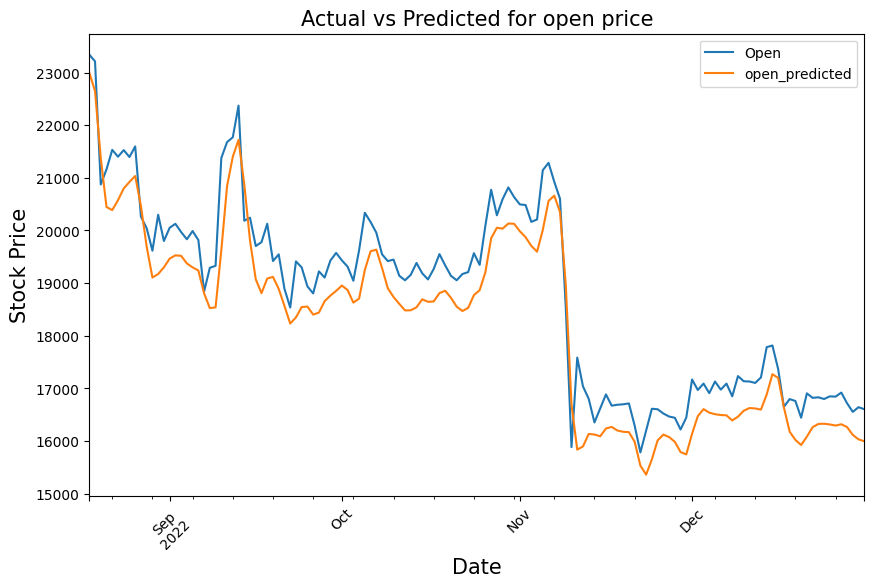

In [ ]:
new_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

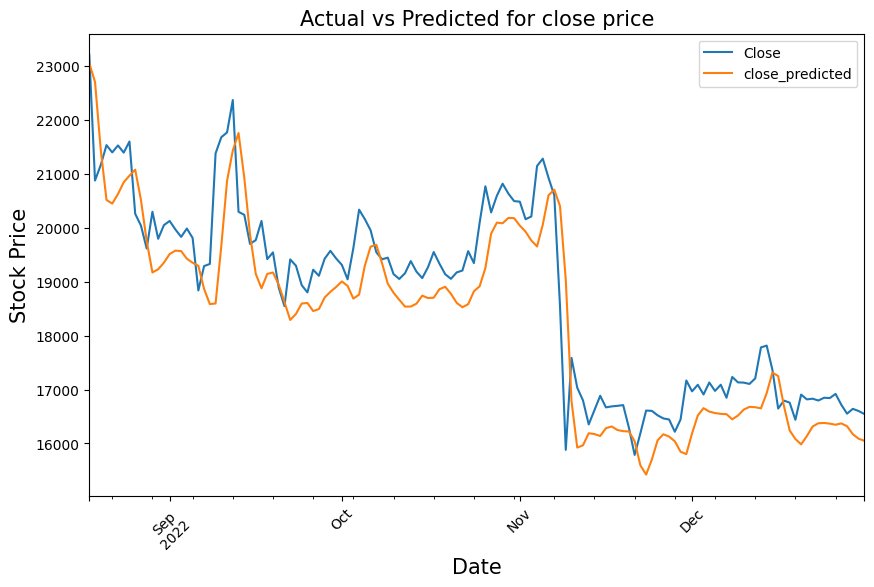

In [ ]:
new_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

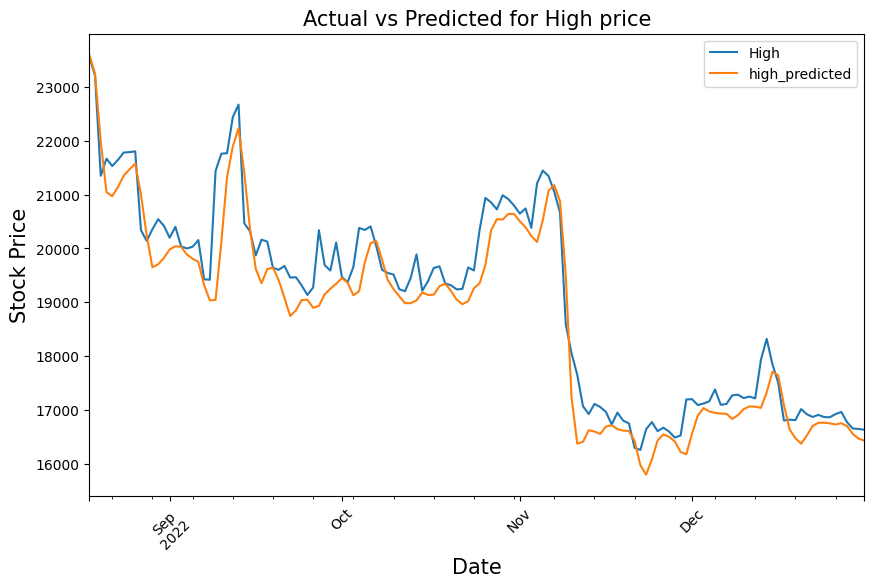

In [ ]:
new_data[['High','high_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for High price',size=15)
plt.show()

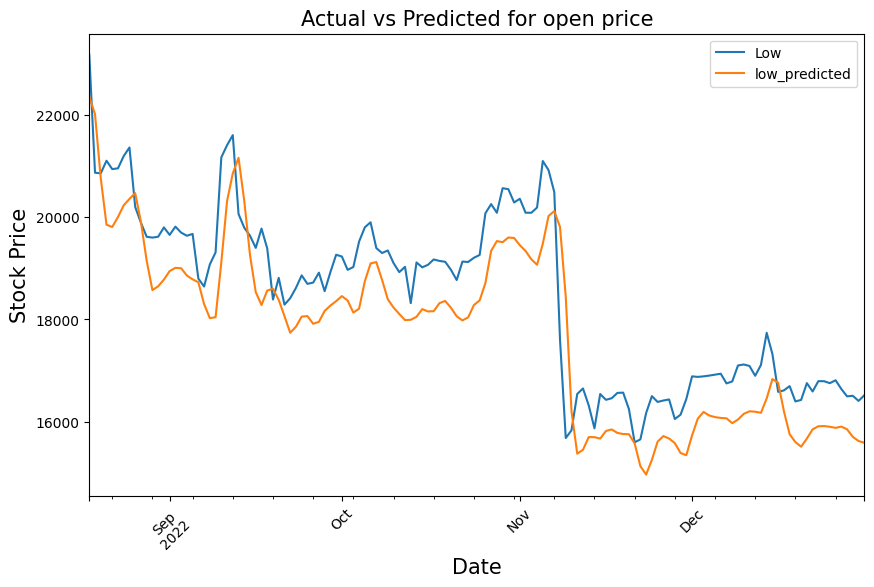

In [ ]:
new_data[['Low', 'low_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

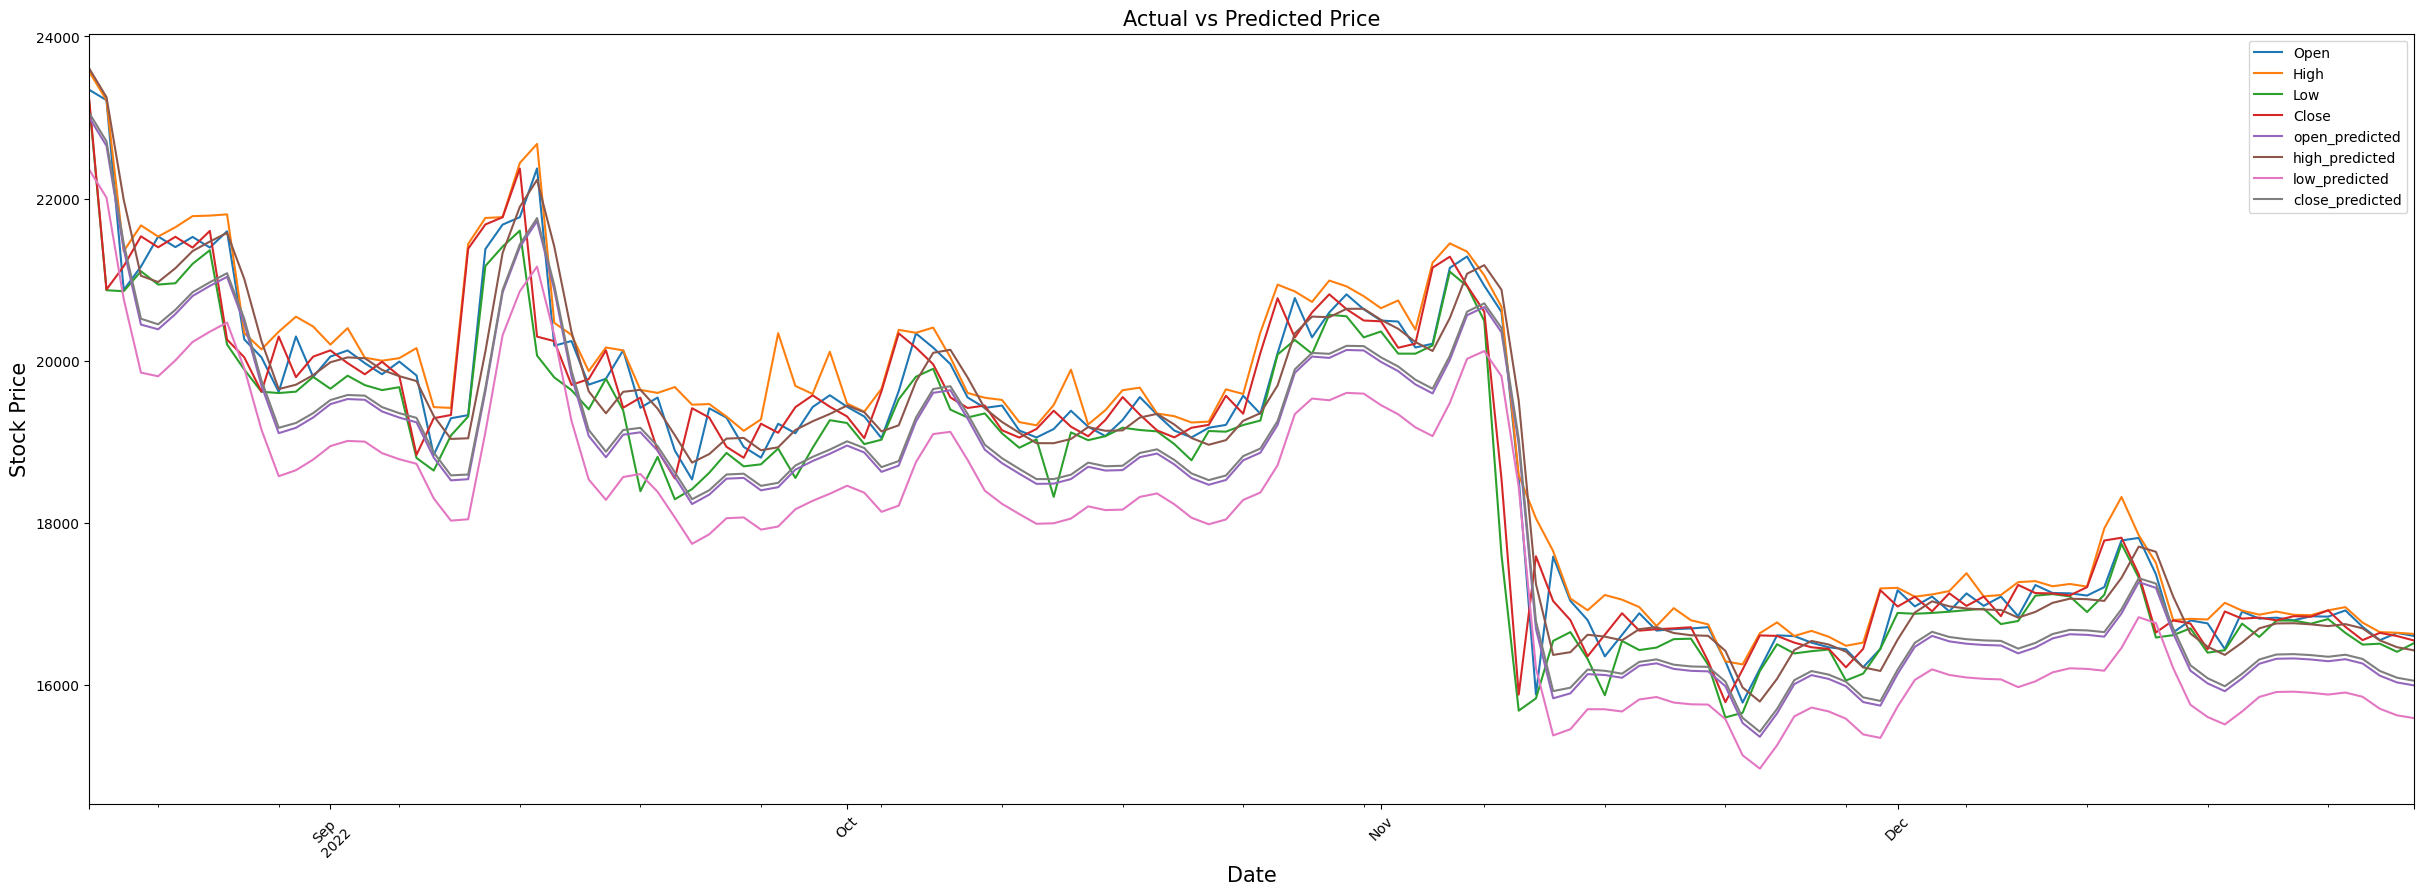

In [ ]:
new_data[:].plot(figsize=(30,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted Price',size=15)
plt.show()

In [ ]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,23341.04,23563.83,23177.60,23212.74,23000.125000,23602.863281,22354.847656,23054.937500
2022-08-19,23213.31,23213.31,20868.85,20877.55,22649.294922,23250.265625,22011.525391,22705.134766
2022-08-20,20872.84,21350.81,20856.73,21166.06,21376.261719,21984.078125,20760.644531,21445.164062
2022-08-21,21160.39,21668.85,21103.20,21534.12,20445.199219,21046.873047,19852.626953,20517.289062
2022-08-22,21531.46,21531.46,20939.18,21398.91,20386.933594,20970.046875,19807.582031,20448.875000
...,...,...,...,...,...,...,...,...
2022-12-27,16919.29,16959.85,16642.07,16717.17,16317.149414,16750.095703,15906.132812,16372.437500
2022-12-28,16716.40,16768.17,16497.56,16552.57,16264.133789,16697.921875,15853.626953,16320.342773
2022-12-29,16552.32,16651.76,16508.68,16642.34,16114.283203,16549.455078,15706.156250,16172.417969


# Predicting upcoming Days



In [ ]:
start_predict = new_data.index[-1]
end_predict = pd.to_datetime("today")
period = (start_predict - end_predict).days - 1
period

-157

In [ ]:
# Creating a dataframe and adding N days to existing index

new_rows = pd.DataFrame(index=pd.date_range(start=start_predict,  end=end_predict, freq='D', inclusive='right'), columns=new_data.columns[:4])
new_pred_data = pd.concat([new_data.drop(columns=['open_predicted','high_predicted', 'low_predicted', 'close_predicted'], axis= 0), new_rows], axis=0)

In [ ]:
new_rows

,Open,High,Low,Close
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-05-31,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN
2023-06-02,NaN,NaN,NaN,NaN
2023-06-03,NaN,NaN,NaN,NaN


In [ ]:
#Get Latest Price

latest_date_start = start_predict.strftime("%d-%m-%Y")

latest_date_end = end_predict.strftime("%d-%m-%Y")

latest_scraper = CmcScraper(crypto, latest_date_start, latest_date_end)
latest_price =  latest_scraper.get_dataframe()

In [ ]:
latest_price['Open'] = latest_price['Open'].apply(lambda x:round(x,2))
latest_price['High'] = latest_price['High'].apply(lambda x:round(x,2))
latest_price['Low'] = latest_price['Low'].apply(lambda x:round(x,2))
latest_price['Close'] = latest_price['Close'].apply(lambda x:round(x,2))

In [ ]:
latest_price = latest_price[::-1]
latest_price = latest_price.reset_index()

In [ ]:
latest_price = latest_price[['Date','Open','High','Low','Close']] # Extracting required columns
latest_price['Date'] = pd.to_datetime(latest_price['Date'])
latest_price.set_index('Date', drop=True, inplace=True) # Setting date column as index

In [ ]:
latest_price

,Open,High,Low,Close
Date,,,,
2022-12-31,16603.67,16628.99,16517.52,16547.50
2023-01-01,16547.91,16630.44,16521.23,16625.08
2023-01-02,16625.51,16759.34,16572.23,16688.47
2023-01-03,16688.85,16760.45,16622.37,16679.86
2023-01-04,16680.20,16964.59,16667.76,16863.24
...,...,...,...,...
2023-05-30,27745.12,28044.76,27588.50,27702.35
2023-05-31,27700.53,27831.68,26866.45,27219.66
2023-06-01,27218.41,27346.11,26671.72,26819.97


In [ ]:
new_pred_data

,Open,High,Low,Close
2022-08-18,23341.04,23563.83,23177.60,23212.74
2022-08-19,23213.31,23213.31,20868.85,20877.55
2022-08-20,20872.84,21350.81,20856.73,21166.06
2022-08-21,21160.39,21668.85,21103.20,21534.12
2022-08-22,21531.46,21531.46,20939.18,21398.91
...,...,...,...,...
2023-05-31,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN
2023-06-02,NaN,NaN,NaN,NaN
2023-06-03,NaN,NaN,NaN,NaN


In [ ]:
upcoming_prediction = pd.DataFrame(columns=['Open','High','Low','Close'], index=new_pred_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
test_seq[-1:]

array([[[0.21049876, 0.20637245, 0.21217129, 0.20911036],
        [0.20915578, 0.20560549, 0.20957568, 0.20931   ],
        [0.20933131, 0.20619528, 0.21278328, 0.20878964],
        [0.20882217, 0.20557535, 0.21276851, 0.20958148],
        [0.20960988, 0.20551185, 0.21216081, 0.20949155],
        [0.20952788, 0.20642324, 0.2130676 , 0.21070432],
        [0.21072885, 0.20703109, 0.21036405, 0.20754633],
        [0.20756602, 0.20409849, 0.20806991, 0.20498116],
        [0.2050082 , 0.20231747, 0.20824644, 0.20638016],
        [0.20639577, 0.20219003, 0.20665574, 0.20576069]]])

In [ ]:
currenct_seq = test_seq[-1:]

for i in range(period, 0):
  up_pred = model.predict(currenct_seq)
  upcoming_prediction.iloc[i] = up_pred
  currenct_seq = np.append(currenct_seq[0][1:],up_pred,axis=0)
  currenct_seq = currenct_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 22ms/step


In [ ]:
upcoming_prediction[['Open','High','Low','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','High','Low','Close']])

In [ ]:
upcoming_prediction[start_predict:end_predict]

,Open,High,Low,Close
2022-12-31,15705.381368,16139.239343,15307.196668,15765.745991
2023-01-01,15331.165753,15765.383879,14941.206992,15394.450590
2023-01-02,14936.710227,15369.276238,14556.266182,15001.674871
2023-01-03,14541.738523,14970.700570,14171.898881,14607.363546
2023-01-04,14152.364482,14576.165882,13793.961262,14218.040550
...,...,...,...,...
2023-05-31,380.109335,319.816559,470.380807,381.337587
2023-06-01,378.465212,318.088746,468.779488,379.664292
2023-06-02,376.876531,316.429109,467.245751,378.069404
2023-06-03,375.366233,314.841546,465.777719,376.543359


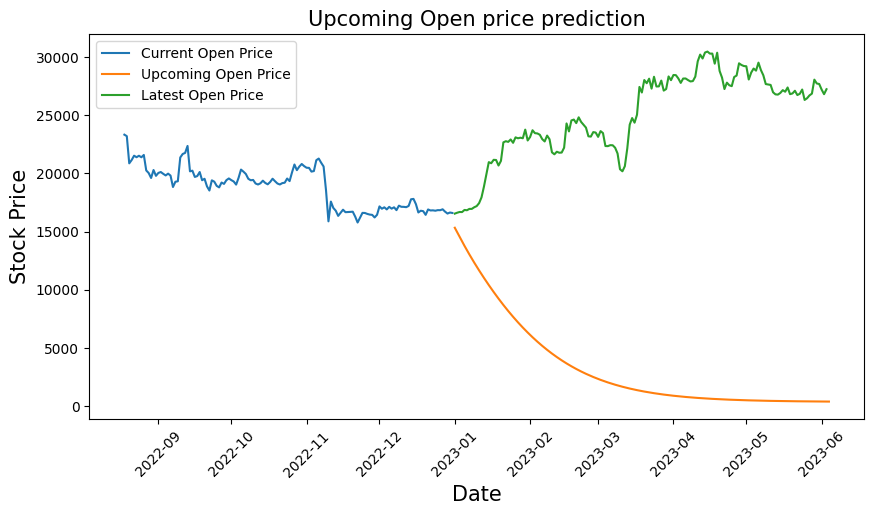

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Open'],label='Upcoming Open Price')
ax.plot(latest_price.loc['2023-01-01':,'Open'],label='Latest Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

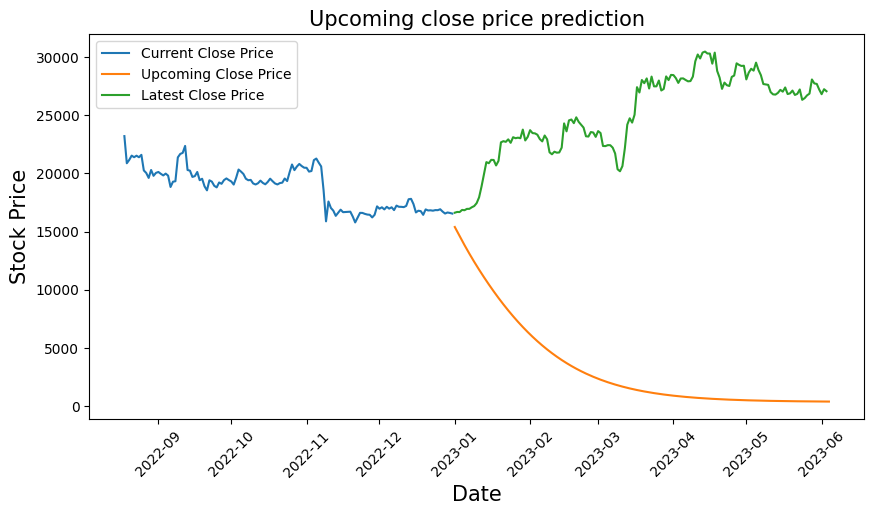

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Close'],label='Upcoming Close Price')
ax.plot(latest_price.loc['2023-01-01':,'Close'],label='Latest Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

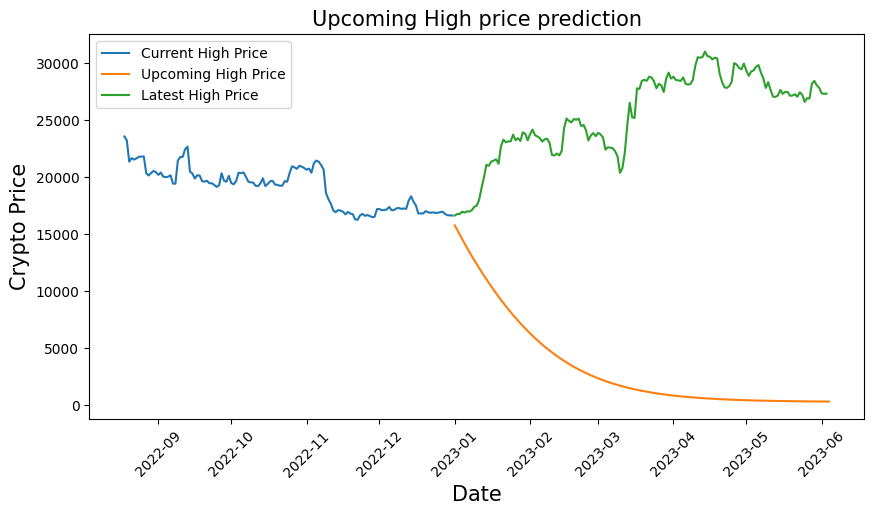

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'High'],label='Current High Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'High'],label='Upcoming High Price')
ax.plot(latest_price.loc['2023-01-01':,'High'],label='Latest High Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming High price prediction',size=15)
ax.legend()
fig.show()

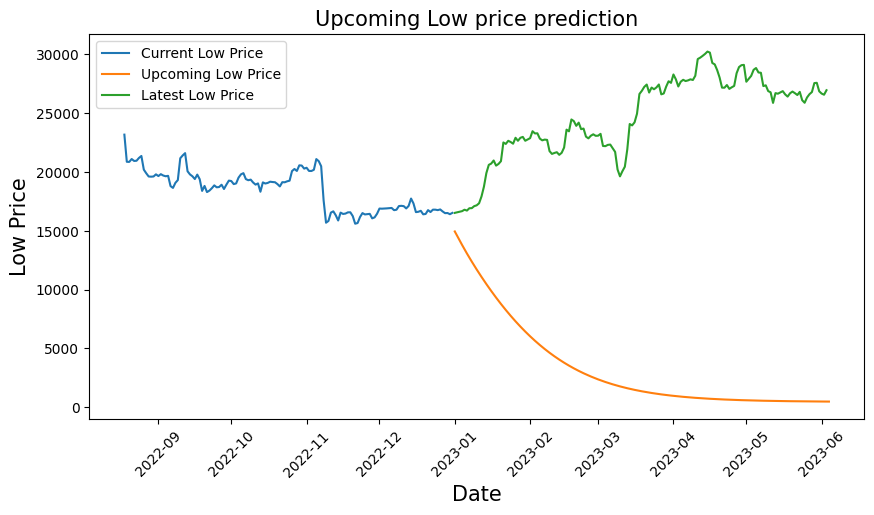

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Low'],label='Current Low Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Low'],label='Upcoming Low Price')
ax.plot(latest_price.loc['2023-01-01':,'Low'],label='Latest Low Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Low Price',size=15)
ax.set_title('Upcoming Low price prediction',size=15)
ax.legend()
fig.show()

In [ ]:
# data_akumululasi = pd.concat([new_pred_data.loc['2022-01-01':,:], upcoming_prediction.loc['2023-01-01':,:]])
# data_akumululasi

In [ ]:
# !zip -r /content/BTC_model.zip /content/BTC_model

  adding: content/BTC_model/ (stored 0%)
  adding: content/BTC_model/variables/ (stored 0%)
  adding: content/BTC_model/variables/variables.index (deflated 64%)
  adding: content/BTC_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/BTC_model/saved_model.pb (deflated 91%)
  adding: content/BTC_model/assets/ (stored 0%)
  adding: content/BTC_model/keras_metadata.pb (deflated 92%)
  adding: content/BTC_model/fingerprint.pb (stored 0%)


In [ ]:
#!zip -r /content/ETH_model.zip /content/ETH_model

In [ ]:
#!zip -r /content/USDT_model.zip /content/USDT_model

In [ ]:
# !zip -r /content/USDC_model.zip /content/USDC_model

In [ ]:
# !zip -r /content/BNB_model.zip /content/BNB_model